In [2]:
import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import scipy

In [3]:
def get(data,index):
    l = []
    for d in data:
        l.append(d[index])
    return l

def normalize(vs):
    minb = min(B)
    maxb = max(B)
    l = []
    for v in vs:
        l.append((v-minb)/(maxb-minb))
    return np.array(l)
import json

def load(filepath):
    with open(filepath,'r') as fh:
        obj = json.loads(fh.read())
    dataset = {}
    for idx,cat in enumerate(obj['groups']['values']):
        key = str(cat)
        if not key in dataset:
            dataset[key] = {"X":[],"D":[],"B":[],"N":[]}
    
        pars = dict(zip(obj['params']['fields'], \
                           obj['params']['values'][idx]))
        expect = dict(zip(obj['expected']['fields'], \
                        obj['expected']['values'][idx]))
        meas = dict(zip(obj['observed']['fields'], \
                        obj['observed']['values'][idx]))
        
        dataset[key]['X'].append(list(pars.values()))
        dataset[key]['D'].append(expect['output'])
        dataset[key]['B'].append(meas['bias'])
        dataset[key]['N'].append(meas['noise'])
    return dataset


In [6]:
filepath = "../../outputs/datasets/mult_0_3_0_0.json"
dataset = load(filepath)
k = list(dataset.keys())[0]
print(k)
D = dataset[k]['D']
B = dataset[k]['B']
n = len(B)

['pos', 'pos', 'pos', 'medium', 'medium', 'medium', False, 'out0']


In [7]:
targ = np.array(list(map(lambda i: D[i], range(n))))
bias = np.array(B)
meas = np.array(list(map(lambda i: B[i]+D[i], range(n))))
print("targ: [%f,%f]" % (min(targ),max(targ)))
print("bias: [%f,%f]" % (min(bias),max(bias)))
print("meas: [%f,%f]" % (min(meas),max(meas)))

targ: [-0.841797,0.849609]
bias: [-0.263672,0.261719]
meas: [-1.105469,1.096680]


In [8]:
def nonlin_fit(xdata,a,b):
    x = xdata
    result = (a)*(x) + b
    return result

In [9]:
v = nonlin_fit(inps,1.0,0.0)
(a,b),corrs = scipy.optimize.curve_fit(nonlin_fit, targ, meas)
print(a,b)

NameError: name 'inps' is not defined

In [29]:
def predict(v):
    return a*v + b

In [30]:
pred = list(map(lambda i: predict(targ[i]) - targ[i], range(n)))

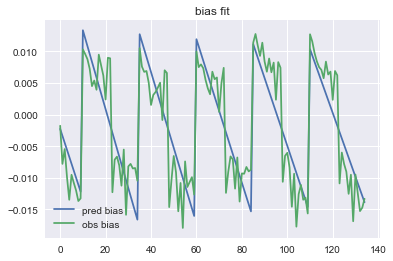

In [31]:
plt.plot(pred,label='pred bias')
plt.plot(obs,label='obs bias')
plt.title("bias fit")
plt.legend()

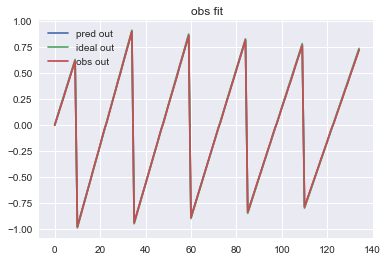

In [28]:
plt.plot(pred+targ,label='pred out')
plt.plot(targ,label='ideal out')
plt.plot(meas,label='obs out')
plt.title("obs fit")
plt.legend()